<a href="https://colab.research.google.com/github/MathewBiddle/ioos_metrics/blob/main/GTS_Totals_weather_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IOOS GTS Statistics

Created: 2020-10-10

Updated: 2022-07-26

The Global Telecommunication System (GTS) is a coordinated effort for rapid distribution of observations.
The GTS monthly reports show the number of messages released to GTS for each station.
The reports contain the following fields:

- location ID: Identifier that station messages are released under to the GTS;
- region: Designated IOOS Regional Association (only for IOOS regional report);
- sponsor: Organization that owns and maintains the station;
- Met: Total number of met messages released to the GTS
- Wave: Total number of wave messages released to the GTS

In this notebook we will explore the statistics of the messages IOOS is releasing to GTS.

## Using this notebook

1. Pick the appropriate date range of interest.
1. Edit the variables `start_date` and `end_date` in the cell below to reflect your time period of interest (use `YYYY-MM-DD` format).
1. Run all the cells in the notebook.

The first step is to pick the appropriate date range of interest.

In [36]:
start_date = "2018-01-01"
end_date = "2023-05-15"

Now we download the data. We will use the NDBC ioosstats server that [hosts the CSV files](https://www.ndbc.noaa.gov/ioosstats/) with the ingest data.

In [49]:
import pandas as pd


url_ioos = 'https://erddap.ioos.us/erddap/tabledap/gts_regional_statistics.csvp'
df_ioos = pd.read_csv(url_ioos,parse_dates=[2])
df_ioos['source'] = 'IOOS'

url_ndbc = 'https://erddap.ioos.us/erddap/tabledap/gts_ndbc_statistics.csvp'
df_ndbc = pd.read_csv(url_ndbc,parse_dates=[2])
df_ndbc['source'] = 'NDBC'

url_nonndbc = 'https://erddap.ioos.us/erddap/tabledap/gts_non_ndbc_statistics.csvp'
df_nonndbc = pd.read_csv(url_nonndbc,parse_dates=[2])
df_nonndbc['source'] = 'non-NDBC'

df_out = pd.concat([df_ioos,df_ndbc,df_nonndbc])

print(df_ioos.describe())

print(df_ndbc.describe())

print(df_nonndbc.describe())

print(df_out.describe())

               Year         Month           met          wave
count  11244.000000  11244.000000  11244.000000  11244.000000
mean    2020.294379      6.342761   5210.514052    750.615795
std        1.606422      3.436842   5702.806272   1790.069410
min     2018.000000      1.000000      0.000000      0.000000
25%     2019.000000      3.000000      0.000000      0.000000
50%     2020.000000      6.000000   2624.000000      0.000000
75%     2022.000000      9.000000   8768.000000      0.000000
max     2023.000000     12.000000  82462.000000  17838.000000
              Year        Month          met         wave
count  9508.000000  9508.000000  9508.000000  9508.000000
mean   2020.218027     6.297329  4381.620951   893.299748
std       1.573521     3.450509  3671.374937   819.402273
min    2018.000000     1.000000     0.000000     0.000000
25%    2019.000000     3.000000  1436.000000     0.000000
50%    2020.000000     6.000000  1488.000000  1337.000000
75%    2022.000000     9.000000  862

In [38]:
# import datetime as dt

# import pandas as pd

# # example https://www.ndbc.noaa.gov/ioosstats/rpts/2021_03_ioos_regional.csv

# start = dt.datetime.strptime(start_date, "%Y-%m-%d")
# end = dt.datetime.strptime(end_date, "%Y-%m-%d")

# # build an array for days between dates
# date_array = (start + dt.timedelta(days=x) for x in range(0, (end - start).days))

# # get a unique list of year-months for url build
# months = []
# for date_object in date_array:
#     months.append(date_object.strftime("%Y-%m"))
# months = sorted(set(months))

# df_ioos = pd.DataFrame(columns=["locationID", "region", "sponsor", "met", "wave"])
# df_ndbc = pd.DataFrame(columns=["locationID", "sponsor", "met", "wave"])
# df_nonndbc = pd.DataFrame(columns=["locationID", "sponsor", "met", "wave"])
# df_out = pd.DataFrame(columns=["locationID", "region", "sponsor", "met", "wave"])


# for month in months:
#     url_ioos = (
#         "https://www.ndbc.noaa.gov/ioosstats/rpts/%s_ioos_regional.csv"
#         % month.replace("-", "_")
#     )
#     df1 = pd.read_csv(url_ioos, dtype={"met": float, "wave": float})
#     df1["time (UTC)"] = pd.to_datetime(month)
#     df1['source'] = 'IOOS'
#     df_ioos = pd.concat([df_ioos, df1])

#     url_ndbc = ("https://www.ndbc.noaa.gov/ioosstats/rpts/%s_ndbc.csv"
#                % month.replace("-", "_")
#                )
#     df2 = pd.read_csv(url_ndbc, dtype={"met": float, "wave": float})
#     df2["time (UTC)"] = pd.to_datetime(month)
#     df2['source'] = 'NDBC'
#     df_ndbc = pd.concat([df_ndbc, df2])

#     url_nonndbc = ("https://www.ndbc.noaa.gov/ioosstats/rpts/%s_non_ndbc.csv"
#                % month.replace("-", "_")
#                )
#     df3 = pd.read_csv(url_nonndbc, dtype={"met": float, "wave": float})
#     df3["time (UTC)"] = pd.to_datetime(month)
#     df3['source'] = 'non-NDBC'
#     df_nonndbc = pd.concat([df_nonndbc, df3])

#     df_out = pd.concat([df_out, df1, df2, df3])

# print(df_ioos.describe())

# print(df_ndbc.describe())

# print(df_nonndbc.describe())

# print(df_out.describe())

                met          wave
count  11244.000000  11244.000000
mean    5210.514052    750.615795
std     5702.806272   1790.069410
min        0.000000      0.000000
25%        0.000000      0.000000
50%     2624.000000      0.000000
75%     8768.000000      0.000000
max    82462.000000  17838.000000
               met         wave
count  9508.000000  9508.000000
mean   4381.620951   893.299748
std    3671.374937   819.402273
min       0.000000     0.000000
25%    1436.000000     0.000000
50%    1488.000000  1337.000000
75%    8628.000000  1466.000000
max    8928.000000  3024.000000
                met          wave
count  33761.000000  33761.000000
mean    8088.019549    376.037736
std     6270.345139   1198.779722
min        0.000000      0.000000
25%        0.000000      0.000000
50%     8964.000000      0.000000
75%    14256.000000      0.000000
max    14880.000000  13690.000000
                met          wave
count  54513.000000  54513.000000
mean    6848.038083    543.51857

Let us check the monthly sum of data released both for individual met and wave and the totals.

In [57]:
import pandas as pd

#df_out["time (UTC)"] = pd.to_datetime(df_out["time (UTC)"])

# Remove time-zone info for easier plotting, it is all UTC.
df_out["time (UTC)"] = df_out["time (UTC)"].dt.tz_localize(None)

groups = df_out[['time (UTC)','met','wave']].groupby(pd.Grouper(key="time (UTC)", freq="M"))

<Axes: xlabel='time (UTC)'>

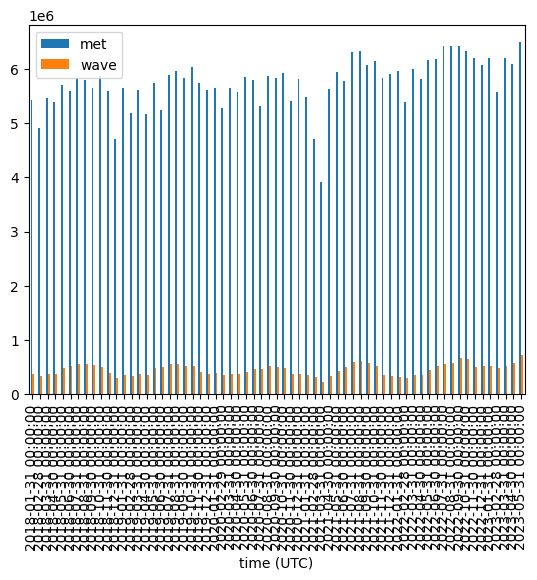

In [58]:
groups.sum().plot(kind='bar')

We can create a table of observations per month,

In [52]:
s = groups[
    [ "met", "wave"]
].sum()  # reducing the columns so the summary is digestable
totals = s.assign(total=s["met"] + s["wave"])
totals.index = totals.index.to_period("M")

print(f"Monthly totals:\n{totals}\n")

print(
    f"Sum for time period {totals.index.min()} to {totals.index.max()}: {totals['total'].sum()}"
)

Monthly totals:
                met    wave    total
time (UTC)                          
2018-01     5416106  368948  5785054
2018-02     4906308  337780  5244088
2018-03     5454492  382206  5836698
2018-04     5388108  379066  5767174
2018-05     5696122  490110  6186232
...             ...     ...      ...
2023-01     6205396  528242  6733638
2023-02     5568626  476792  6045418
2023-03     6205058  518026  6723084
2023-04     6084730  572760  6657490
2023-05     6485208  730334  7215542

[65 rows x 3 columns]

Sum for time period 2018-01 to 2023-05: 402935928


and visualize it in a bar plot.

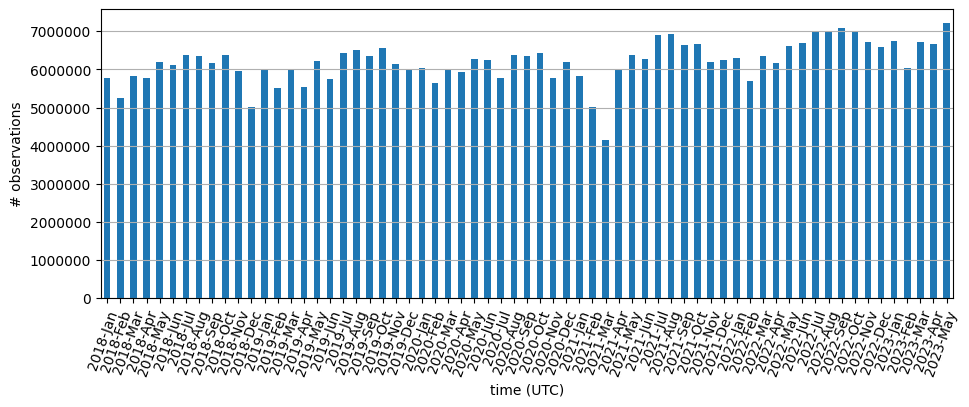

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 3.75))

totals['total'].plot(ax=ax, kind="bar",stacked=True)
ax.set_xticklabels(
    labels=s.index.to_series().dt.strftime("%Y-%b"),
    rotation=70,
    rotation_mode="anchor",
    ha="right",
)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_ylabel("# observations")
ax.grid(axis='y')

Group by source, then by month

In [54]:
group = df_out.groupby(by=['source', pd.Grouper(key="time (UTC)", freq="M")])


s = group[
    ["met", "wave"]
].sum()  # reducing the columns so the summary is digestable

totals = s.assign(total=s["met"] + s["wave"])

totals.reset_index(['source'], inplace=True)

totals.index = totals.index.to_period("M").strftime('%Y-%b')

totals
# bar_data = totals.reset_index()

# bar_data.loc[bar_data['sponsor']=='NATIONAL ESTUARINE RESEARCH RESERVE SYSTEM']

,source,met,wave,total
time (UTC),,,,
2018-Jan,IOOS,701780,63624,765404
2018-Feb,IOOS,676688,61886,738574
2018-Mar,IOOS,759916,69014,828930
2018-Apr,IOOS,773482,75758,849240
2018-May,IOOS,890444,155768,1046212
...,...,...,...,...
2023-Jan,non-NDBC,4449714,219932,4669646
2023-Feb,non-NDBC,4029834,207298,4237132
2023-Mar,non-NDBC,4505624,232330,4737954


# Create stacked bar chart

IOOS + non-NDBC + NDBC

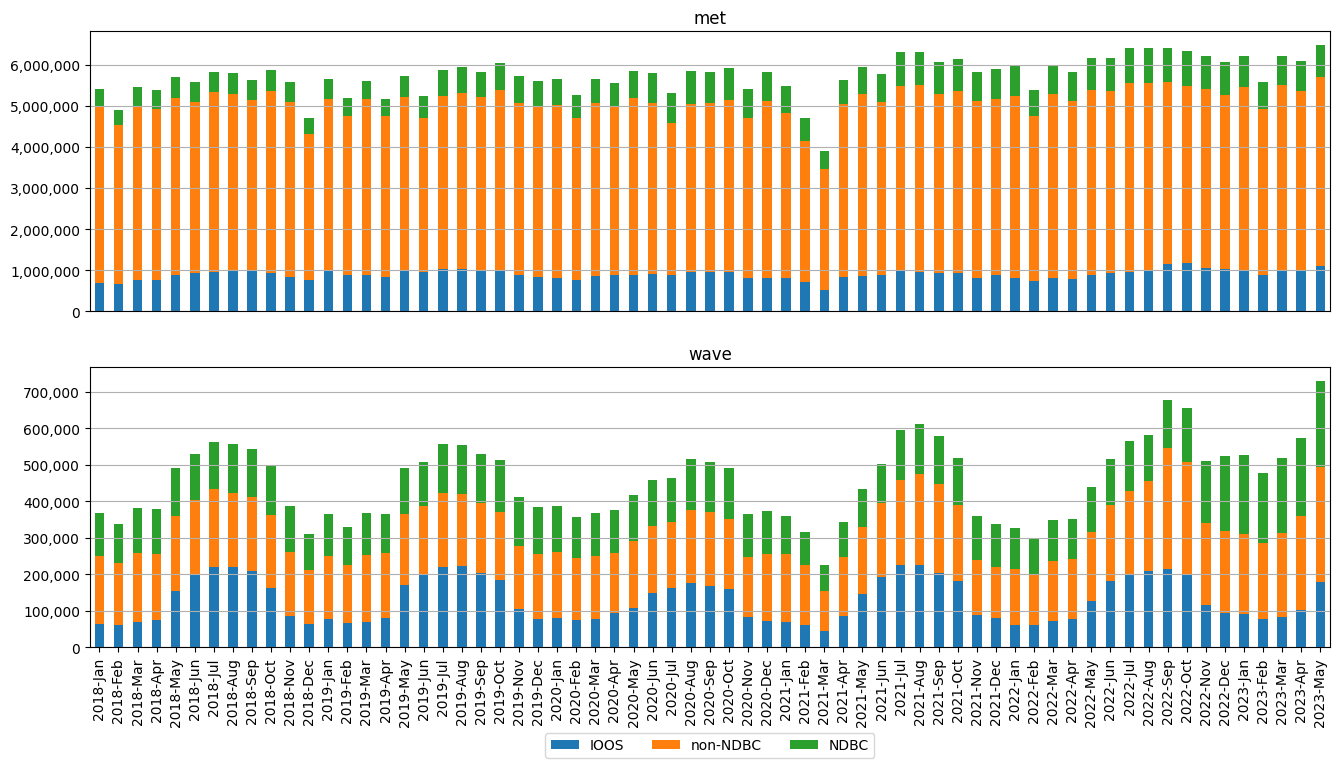

In [61]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator,
                               FuncFormatter)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

df_final = pd.DataFrame({'IOOS': totals.loc[totals['source']=='IOOS','met'],
                         'non-NDBC': totals.loc[totals['source']=='non-NDBC','met'],
                         'NDBC': totals.loc[totals['source']=='NDBC','met'],
                         },
                         index= totals.index.unique())

df_final.plot.bar(stacked=True, xlabel='', ax=axs[0], rot=90, title='met')

axs[0].get_legend().remove()

axs[0].grid(axis='y')

axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
axs[0].axes.get_xaxis().set_visible(False)

df_final = pd.DataFrame({'IOOS': totals.loc[totals['source']=='IOOS','wave'],
                         'non-NDBC': totals.loc[totals['source']=='non-NDBC','wave'],
                         'NDBC': totals.loc[totals['source']=='NDBC','wave'],
                         },
                         index= totals.index.unique())

df_final.plot.bar(stacked=True, xlabel='', ax=axs[1], title='wave')

axs[1].legend(loc='center',bbox_to_anchor=(0.5,-0.35,0,0),ncol=3)

axs[1].grid(axis='y')

axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))



# Create stacked chart

IOOS + non-IOOS (non-NDBC + NDBC)

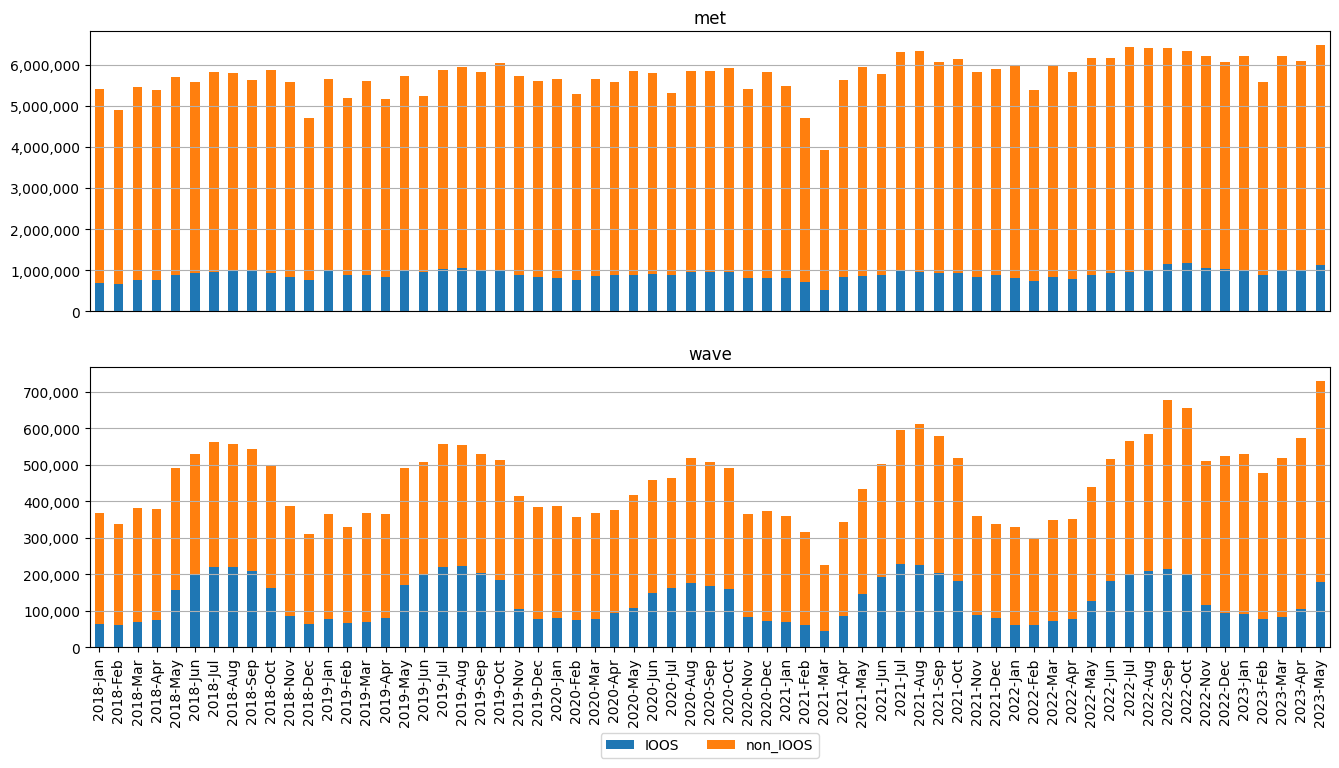

In [76]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator,
                               FuncFormatter)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(16,8))

df_final = pd.DataFrame({'IOOS': totals.loc[totals['source']=='IOOS','met'],
                         'non_IOOS': totals.loc[totals['source']=='NDBC','met']+totals.loc[totals['source']=='non-NDBC','met'],
                         },
                         index= totals.index.unique())

df_final.plot.bar(stacked=True, xlabel='', ax=axs[0], rot=90, title='met')

axs[0].get_legend().remove()

axs[0].grid(axis='y')

axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
axs[0].axes.get_xaxis().set_visible(False)

df_final = pd.DataFrame({'IOOS': totals.loc[totals['source']=='IOOS','wave'],
                         'non_IOOS': totals.loc[totals['source']=='NDBC','wave']+totals.loc[totals['source']=='non-NDBC','wave'],
                         },
                         index= totals.index.unique())

df_final.plot.bar(stacked=True, xlabel='', ax=axs[1], title='wave')

axs[1].legend(loc='center',bbox_to_anchor=(0.5,-0.35,0,0),ncol=3)

axs[1].grid(axis='y')

axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


co-ops = non-ndbc['NATIONAL OCEAN SERVICE'] + non-ndbc['NOAA NOS PHYSICAL OCEANOGRAPHIC RT SYSTEM PROGRAM']
ioos-regional = ioos_regional['met'] +ioos_regional['wave']
nerrs = non-ndbc['NATIONAL ESTUARINE RESEARCH RESERVE SYSTEM']
other = ndbc['total'] + non-ndbc NWS-regional + CBIBS + National Park Service + USACE (not including CDIP stations owned by RAs) + all other NDBC partners (including nonfederal partners outside of IOOS).
 anything not Ocean Service

Ocean Service contributions compared to the total.

split into met and wave